In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A=np.load('fit_exercise.npy')

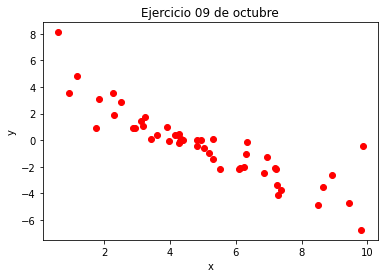

In [3]:
plt.plot(A[0],A[1], 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ejercicio 09 de octubre')
plt.show()

# Linear Last Square

In [4]:
ym=np.mean(A[1])
xm=np.mean(A[0])

a=(A[0]-xm) * (A[1]-ym)
a=a.sum()
b=(A[0]-xm)**2
b=b.sum()
beta1=a/b
beta0= ym - beta1*xm
ylls=beta1*A[0]+beta0

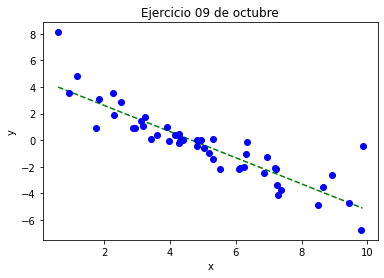

In [5]:
plt.plot(A[0],ylls,'g--')
plt.plot(A[0],A[1], 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ejercicio 09 de octubre')
plt.show()

# Minimum Chisq.

In [6]:
import scipy.optimize as opt
#A[0]-> x; A[1]->y, A[2]->error

x = A[0]
y = A[1]
erry = A[2]

# funcion modelo
def f(x, b0, b1):
    return b0 + b1*x

# función residual
def g(beta):
    return np.sum((y - f(x, *beta))**2/(erry**2))
    
# comenzamos la optimización
#valores iniciales de a y b
beta_start = (0, 0)
#Función de minimizar de scipy 
beta_opt = opt.minimize(g, beta_start)
ych2=beta_opt.x[0]+A[0]*beta_opt.x[1]

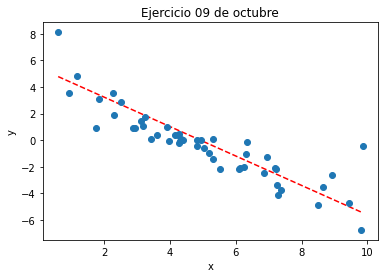

In [7]:
plt.plot(A[0],ych2,'r--')
plt.plot(A[0],A[1], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ejercicio 09 de octubre')
plt.show()

# Sampling from the maximum likelihood

Usando un likelihood gausiano

$$ -ln (\mathcal{L}(\vec{x},\vec{y}|\vec{\theta}))\propto \frac{1}{2} \sum_{i}\frac{( y_i - \lambda (x_i , \theta ))^2 }{\sigma_i^2}$$

In [8]:
#A[0]-> x; A[1]->y, A[2]->error, a->b0, b->b1

# funcion lamda
def fl(x, a, b):
    return a + b*x

# función likelihood
def gl(theta):
    return (1/2)*np.sum((y - fl(x, *theta))**2/(erry**2))

In [9]:
# comenzamos la optimización
#valores iniciales de a y b
theta_start = (0, 0)
#Función de minimizar de scipy 
theta_opt = opt.minimize(gl, theta_start)
ylh2=theta_opt.x[0]+x*theta_opt.x[1]

In [10]:
#Calculo el valor del likelihood
t_opt=(theta_opt.x[0],theta_opt.x[1])
lnl=gl(t_opt)
lh=np.exp(-lnl)
lh

4.655113415616007e-268

In [11]:
#Calculo el likelihood de los métodos anteriores
t_lls=(beta0,beta1)
t_ch2=(beta_opt.x[0],beta_opt.x[1])
lls=np.exp(-gl(t_lls))
lch2=np.exp(-gl(t_ch2))

In [12]:
#comparo el primer resultado con el último
lls-lh

-4.655113415616007e-268

In [13]:
#comparo elsegundo resultado con el último
lch2-lh

1.3759628342723513e-279

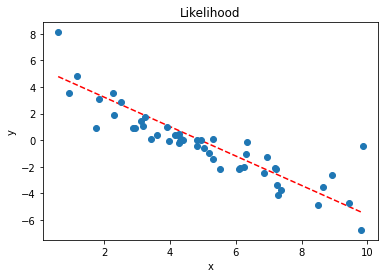

In [14]:
plt.plot(x,ylh2,'r--')
plt.plot(x,y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Likelihood')
plt.show()

## Comparación entre los valores obtenidos con los diferentes métodos

In [15]:
beta0

4.5778593037533595

In [16]:
beta_opt.x[0]

5.440555257845352

In [17]:
theta_opt.x[0]

5.440555021737987

In [18]:
beta1

-0.9821623517930425

In [19]:
beta_opt.x[1]

-1.1040756946101495

In [20]:
theta_opt.x[1]

-1.104075657615836

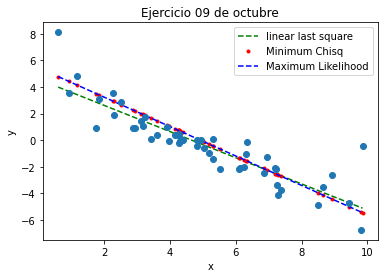

In [23]:
plt.plot(A[0],ylls,'g--',label='linear last square')
plt.plot(A[0],ych2,'r.',label='Minimum Chisq')
plt.plot(x,ylh2,'b--',label='Maximum Likelihood')
plt.plot(A[0],A[1], 'o')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ejercicio 09 de octubre')
plt.show()